In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

jobs1 = pd.read_csv('jobs_1.csv')
jobs2 = pd.read_csv('jobs_2.csv')
jobs3 = pd.read_csv('jobs_3.csv')
jobs4 = pd.read_csv('jobs_4.csv')
jobs5 = pd.read_csv('jobs_5.csv')
jobs6 = pd.read_csv('jobs_6.csv')
jobs7 = pd.read_csv('jobs_7.csv')
jobs8 = pd.read_csv('jobs_8.csv')
jobs9 = pd.read_csv('jobs_9.csv')
jobs10 = pd.read_csv('jobs_10.csv')
jobs11 = pd.read_csv('jobs_11.csv')
jobs12 = pd.read_csv('jobs_12.csv')

jobs=pd.concat([jobs1,jobs2,jobs3,jobs4,jobs5,jobs6,jobs7,jobs8,jobs9,jobs10,jobs11,jobs12], ignore_index=True)
jobs = jobs.drop(['Unnamed: 0'],axis=1)
jobs = jobs.drop(['location'],axis=1)

In [2]:
jobs.replace('NOT_FOUND',np.NaN,inplace=True)
jobs.isna().sum()

unique_id          0
city               0
job_qry            0
job_title          0
company_name       0
summary            0
salary          8364
link               0
date            3739
dtype: int64

In [3]:
jobs.drop(jobs[jobs['date'].isna()].index,inplace = True)
jobs.drop(jobs[jobs['salary'].isna()].index,inplace = True)
jobs.isna().sum()

unique_id       0
city            0
job_qry         0
job_title       0
company_name    0
summary         0
salary          0
link            0
date            0
dtype: int64

In [4]:
jobs.replace('New+York','New York',inplace=True)
jobs['salary'].value_counts()

\n                $55 - $65 an hour                                                                52
\n                $65,000 - $80,000 a year                                                         50
\n\n                                    Similar jobs on Indeed pay $102,000 - $151,000 a year\n    18
\n                $32 - $46 an hour (Indeed est.)                                                  14
\n                $55,000 - $65,000 a year                                                         11
\n\n                                    Similar jobs on Indeed pay $32 - $46 an hour\n             10
\n                $50,000 - $125,000 a year                                                         9
\n                $102,000 - $151,000 a year (Indeed est.)                                          9
\n\n                                    Similar jobs on Indeed pay $98,000 - $144,000 a year\n      9
\n                $110,000 - $115,000 a year                                      

In [5]:
jobs['period'] = jobs['salary'].str.extract('(hour|day|month|year)',expand=False).str.strip()
jobs['min_salary'] = jobs['salary'].str.extract('\$(\d*,*\d*) - ',expand=False).str.strip().str.replace(',','')
jobs['max_salary'] = jobs['salary'].str.extract(' - \$(\d*,*\d*)',expand=False).str.strip().str.replace(',','')
jobs['salary'] = jobs['salary'].str.extract('\$(\d*,*\d*)',expand=False).str.strip().str.replace(',','')
jobs.replace(np.NaN,'0',inplace=True)

jobs['min_salary'] = jobs['min_salary'].astype(int)
jobs['max_salary'] = jobs['max_salary'].astype(int)
jobs['salary'] = jobs['salary'].astype(int)

jobs['min_salary'] = jobs.apply(
    lambda row: row['salary'] if row['min_salary']==0 else row['min_salary'],
    axis=1
)
jobs['max_salary'] = jobs.apply(
    lambda row: row['salary'] if row['max_salary']==0 else row['max_salary'],
    axis=1
)
jobs

,unique_id,city,job_qry,job_title,company_name,summary,salary,link,date,period,min_salary,max_salary
8,p_63b3d1abd3a15c6e,New York,data+analyst,Data Analyst- Entry Level Job,KGS Technology Group Inc,Acquire data from primary or secondary data so...,50000,https://www.indeed.com/company/KGS-Technology-...,9 days ago,year,50000,55000
9,p_cab1183d430c6d47,New York,data+analyst,Data Analyst,"KGS Technology Group, Inc.",Data Analyst *. Acquire data from primary or s...,50000,https://www.indeed.com/company/KGS-Technology-...,1 day ago,year,50000,70000
11,p_8372d18a784078f6,New York,data+analyst,Data Analyst,KGS Technology Group Inc,Designation – Data Analyst. Data analysts work...,50000,https://www.indeed.com/company/KGS-Technology-...,8 days ago,year,50000,55000
15,p_c24dee5660b454d3,New York,data+analyst,Data Analyst*** - Manhattan/New York,Lennon Wright Associates,Collect and interpret data. Work on an innovat...,90000,https://www.indeed.com/company/Lennon-Wright-A...,9 days ago,year,90000,130000
28,p_6ff243bb272b786c,New York,data+analyst,Technical Analyst or Business Analyst,"KMR Information Systems, Inc.",Data Analysis Skills:. Support maintenance of ...,50,https://www.indeed.com/company/KMR-Information...,5 hours ago,hour,50,55
46,p_8372d18a784078f6,New York,data+analyst,Data Analyst,KGS Technology Group Inc,Designation – Data Analyst. Data analysts work...,50000,https://www.indeed.com/company/KGS-Technology-...,8 days ago,year,50000,55000
50,p_d5159d4704e5b28b,New York,data+analyst,"Manager, People - New York City, NY",Anheuser-Busch,Draftline is a new internal creative agency at...,86800,https://www.indeed.com/rc/clk?jk=d5159d4704e5b...,16 days ago,year,86800,97650
62,p_6ff243bb272b786c,New York,data+analyst,Technical Analyst or Business Analyst,"KMR Information Systems, Inc.",Data Analysis Skills:. Support maintenance of ...,50,https://www.indeed.com/company/KMR-Information...,5 hours ago,hour,50,55
63,p_9f9aca22b1896e53,New York,data+analyst,Business Analyst,Venture backed ad tech company,Proficiency with SQL and a data visualization ...,75000,https://www.indeed.com/company/Yieldmo/jobs/Bu...,8 hours ago,year,75000,130000
65,p_63b3d1abd3a15c6e,New York,data+analyst,Data Analyst- Entry Level Job,KGS Technology Group Inc,Acquire data from primary or secondary data so...,50000,https://www.indeed.com/company/KGS-Technology-...,9 days ago,year,50000,55000


In [6]:
jobs['salary'] = jobs.apply(
    lambda row: row['salary']*2080 if row['period']=='hour' else row['salary'],
    axis=1
)
jobs['salary'] = jobs.apply(
    lambda row: row['salary']*260 if row['period']=='day' else row['salary'],
    axis=1
)
jobs['salary'] = jobs.apply(
    lambda row: row['salary']*260/30 if row['period']=='month' else row['salary'],
    axis=1
)
jobs['min_salary'] = jobs.apply(
    lambda row: row['min_salary']*2080 if row['period']=='hour' else row['min_salary'],
    axis=1
)
jobs['min_salary'] = jobs.apply(
    lambda row: row['min_salary']*260 if row['period']=='day' else row['min_salary'],
    axis=1
)
jobs['min_salary'] = jobs.apply(
    lambda row: row['min_salary']*260/30 if row['period']=='month' else row['min_salary'],
    axis=1
)
jobs['max_salary'] = jobs.apply(
    lambda row: row['max_salary']*2080 if row['period']=='hour' else row['max_salary'],
    axis=1
)
jobs['max_salary'] = jobs.apply(
    lambda row: row['max_salary']*260 if row['period']=='day' else row['max_salary'],
    axis=1
)
jobs['max_salary'] = jobs.apply(
    lambda row: row['max_salary']*260/30 if row['period']=='month' else row['max_salary'],
    axis=1
)
jobs[jobs.salary<=10000]

,unique_id,city,job_qry,job_title,company_name,summary,salary,link,date,period,min_salary,max_salary


In [7]:
location = jobs.groupby(['city'], as_index=False)['salary'].mean()
location

,city,salary
0,Boston,85767.666667
1,Chicago,76711.175969
2,New York,91963.092593


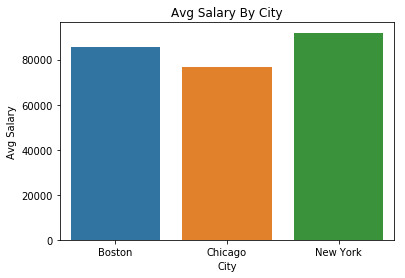

In [8]:
sns.barplot(x='city',y='salary',data=location)
plt.title('Avg Salary By City')
plt.xlabel('City')
plt.ylabel('Avg Salary')
plt.show()

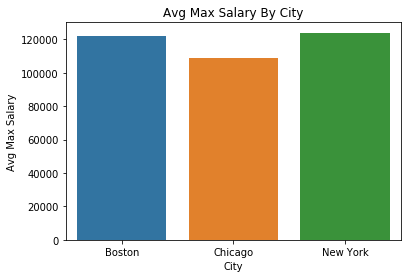

,city,max_salary
0,Boston,121886.407080
1,Chicago,108942.182946
2,New York,123945.592593


In [9]:
locmin = jobs.groupby(['city'], as_index=False)['max_salary'].mean()
sns.barplot(x='city',y='max_salary',data=locmin)
plt.title('Avg Max Salary By City')
plt.xlabel('City')
plt.ylabel('Avg Max Salary')
plt.show()
locmin

In [10]:
jobs['unit'] = jobs['date'].str.extract('(second|minute|hour|day|month|year)',expand=False).str.strip()
jobs['min_ago'] = jobs['date'].str.extract('(\d*)',expand=False).str.strip().str.replace(',','')
jobs['min_ago'] = jobs['min_ago'].astype(int)
jobs

,unique_id,city,job_qry,job_title,company_name,summary,salary,link,date,period,min_salary,max_salary,unit,min_ago
8,p_63b3d1abd3a15c6e,New York,data+analyst,Data Analyst- Entry Level Job,KGS Technology Group Inc,Acquire data from primary or secondary data so...,50000.0,https://www.indeed.com/company/KGS-Technology-...,9 days ago,year,50000.0,55000.0,day,9
9,p_cab1183d430c6d47,New York,data+analyst,Data Analyst,"KGS Technology Group, Inc.",Data Analyst *. Acquire data from primary or s...,50000.0,https://www.indeed.com/company/KGS-Technology-...,1 day ago,year,50000.0,70000.0,day,1
11,p_8372d18a784078f6,New York,data+analyst,Data Analyst,KGS Technology Group Inc,Designation – Data Analyst. Data analysts work...,50000.0,https://www.indeed.com/company/KGS-Technology-...,8 days ago,year,50000.0,55000.0,day,8
15,p_c24dee5660b454d3,New York,data+analyst,Data Analyst*** - Manhattan/New York,Lennon Wright Associates,Collect and interpret data. Work on an innovat...,90000.0,https://www.indeed.com/company/Lennon-Wright-A...,9 days ago,year,90000.0,130000.0,day,9
28,p_6ff243bb272b786c,New York,data+analyst,Technical Analyst or Business Analyst,"KMR Information Systems, Inc.",Data Analysis Skills:. Support maintenance of ...,104000.0,https://www.indeed.com/company/KMR-Information...,5 hours ago,hour,104000.0,114400.0,hour,5
46,p_8372d18a784078f6,New York,data+analyst,Data Analyst,KGS Technology Group Inc,Designation – Data Analyst. Data analysts work...,50000.0,https://www.indeed.com/company/KGS-Technology-...,8 days ago,year,50000.0,55000.0,day,8
50,p_d5159d4704e5b28b,New York,data+analyst,"Manager, People - New York City, NY",Anheuser-Busch,Draftline is a new internal creative agency at...,86800.0,https://www.indeed.com/rc/clk?jk=d5159d4704e5b...,16 days ago,year,86800.0,97650.0,day,16
62,p_6ff243bb272b786c,New York,data+analyst,Technical Analyst or Business Analyst,"KMR Information Systems, Inc.",Data Analysis Skills:. Support maintenance of ...,104000.0,https://www.indeed.com/company/KMR-Information...,5 hours ago,hour,104000.0,114400.0,hour,5
63,p_9f9aca22b1896e53,New York,data+analyst,Business Analyst,Venture backed ad tech company,Proficiency with SQL and a data visualization ...,75000.0,https://www.indeed.com/company/Yieldmo/jobs/Bu...,8 hours ago,year,75000.0,130000.0,hour,8
65,p_63b3d1abd3a15c6e,New York,data+analyst,Data Analyst- Entry Level Job,KGS Technology Group Inc,Acquire data from primary or secondary data so...,50000.0,https://www.indeed.com/company/KGS-Technology-...,9 days ago,year,50000.0,55000.0,day,9


In [11]:
jobs['min_ago'] = jobs.apply(
    lambda row: row['min_ago']/60 if row['unit']=='second' else row['min_ago'],
    axis=1
)
jobs['min_ago'] = jobs.apply(
    lambda row: row['min_ago']*60 if row['unit']=='hour' else row['min_ago'],
    axis=1
)
jobs['min_ago'] = jobs.apply(
    lambda row: row['min_ago']*24*60 if row['unit']=='day' else row['min_ago'],
    axis=1
)
jobs['min_ago'] = jobs.apply(
    lambda row: row['min_ago']*720*60 if row['unit']=='month' else row['min_ago'],
    axis=1
)
jobs['min_ago'] = jobs.apply(
    lambda row: row['min_ago']*8640*60 if row['unit']=='year' else row['min_ago'],
    axis=1
)
jobs = jobs.drop(['unit'],axis=1)
jobs = jobs.drop(['salary'],axis=1)
jobs.to_csv('jobs_data.csv')